<a href="https://colab.research.google.com/github/Roxaxx/Data110/blob/main/Final_Project_social_media_engagement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
from IPython.display import display

In [ ]:
# Load dataset
df = pd.read_csv("Viral_Social_Media_Trends.csv")

In [ ]:
# Preview data
display(df.head())

Post_ID   Platform     Hashtag Content_Type     Region    Views   Likes  \
0  Post_1     TikTok  #Challenge        Video         UK  4163464  339431   
1  Post_2  Instagram  #Education       Shorts      India  4155940  215240   
2  Post_3    Twitter  #Challenge        Video     Brazil  3666211  327143   
3  Post_4    YouTube  #Education       Shorts  Australia   917951  127125   
4  Post_5     TikTok      #Dance         Post     Brazil    64866  171361   

   Shares  Comments Engagement_Level  
0   53135     19346             High  
1   65860     27239           Medium  
2   39423     36223           Medium  
3   11687     36806              Low  
4   69581      6376           Medium

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [ ]:
# Check for nulls
print(df.isnull().sum())

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [ ]:
# Basic stats
display(df.describe())

Views          Likes        Shares      Comments
count  5.000000e+03    5000.000000   5000.000000   5000.000000
mean   2.494066e+06  251475.029800  50519.562000  24888.393800
std    1.459490e+06  144349.583384  29066.362671  14284.504319
min    1.266000e+03     490.000000     52.000000     18.000000
25%    1.186207e+06  126892.250000  25029.000000  12305.250000
50%    2.497373e+06  249443.000000  50839.500000  25004.000000
75%    3.759781e+06  373970.750000  75774.250000  37072.750000
max    4.999430e+06  499922.000000  99978.000000  49993.000000

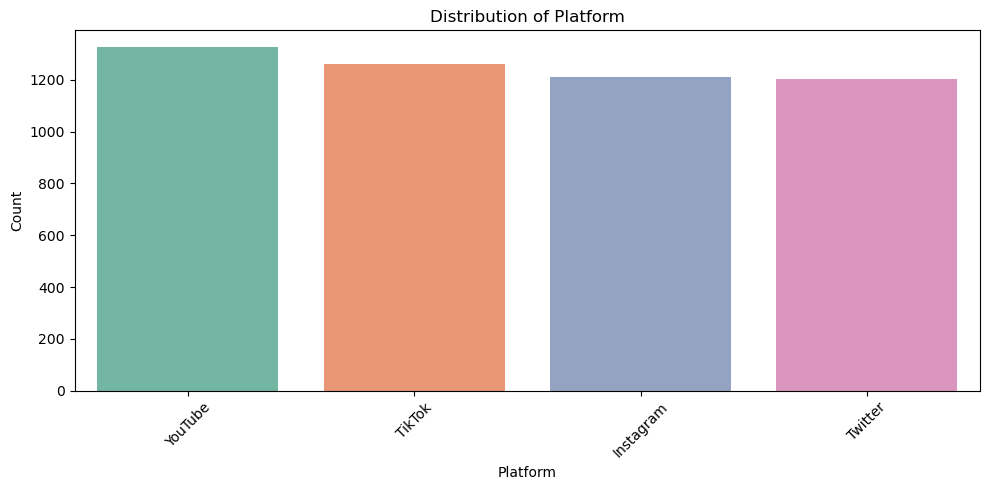

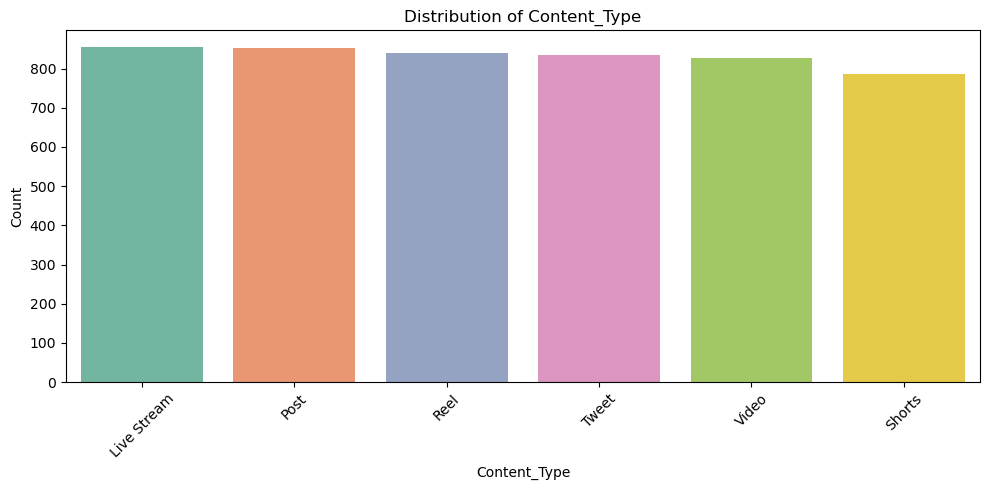

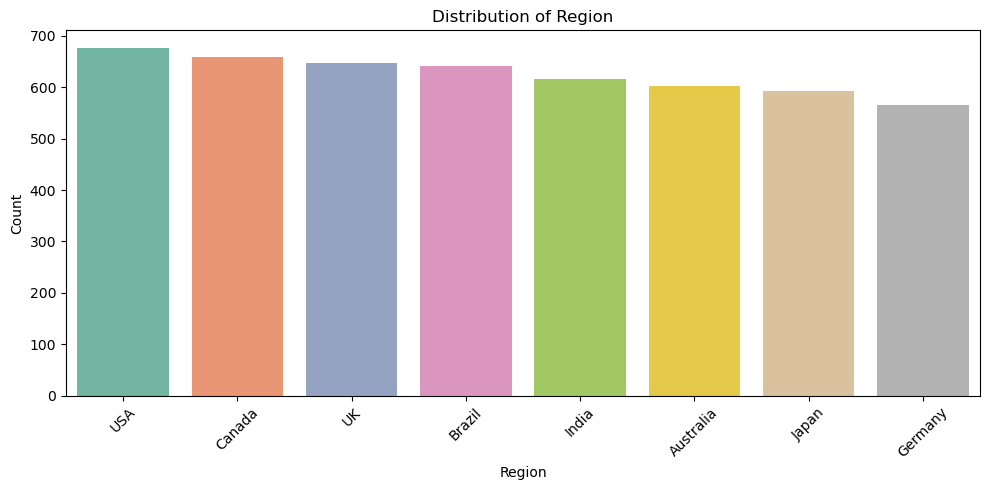

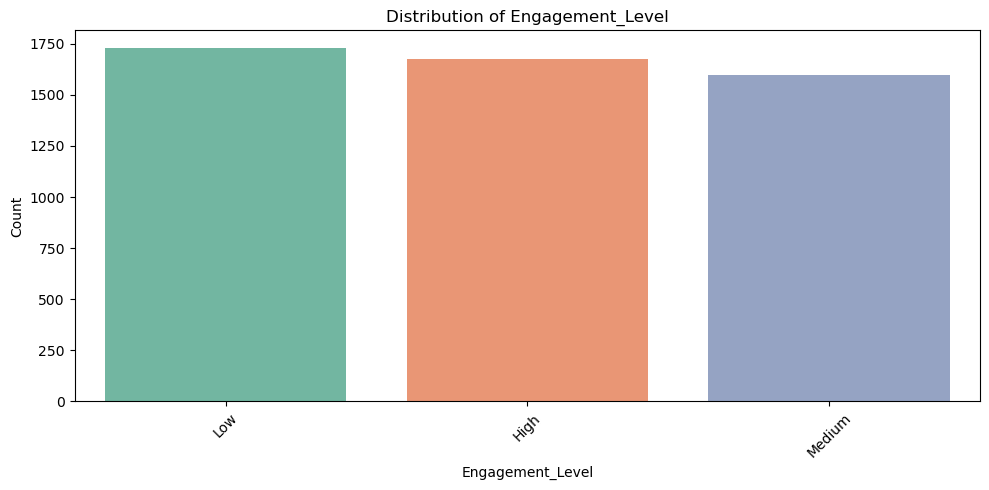

In [ ]:
categorical_cols = ['Platform', 'Content_Type', 'Region', 'Engagement_Level']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    order = df[col].value_counts().index  # sort by count
    sns.countplot(data=df, x=col, order=order, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

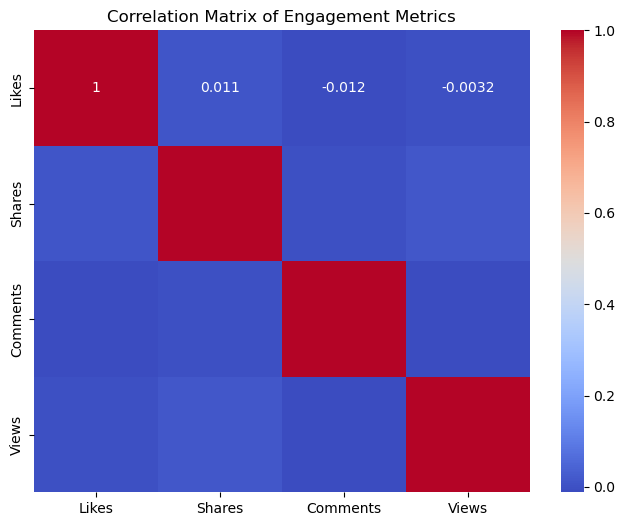

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Likes', 'Shares', 'Comments', 'Views']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

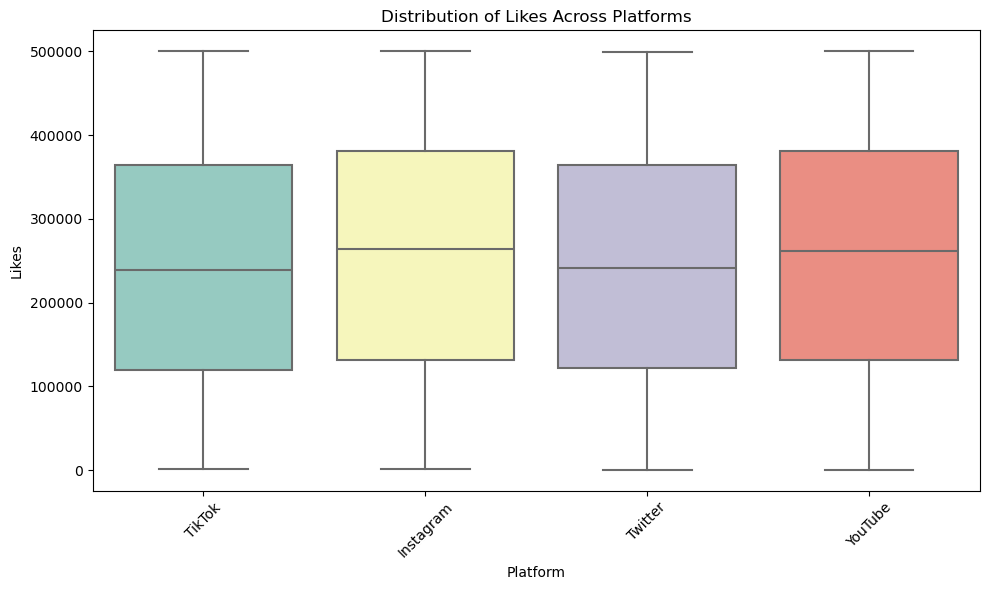

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Platform', y='Likes', palette='Set3')
plt.title('Distribution of Likes Across Platforms')
plt.ylabel('Likes')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

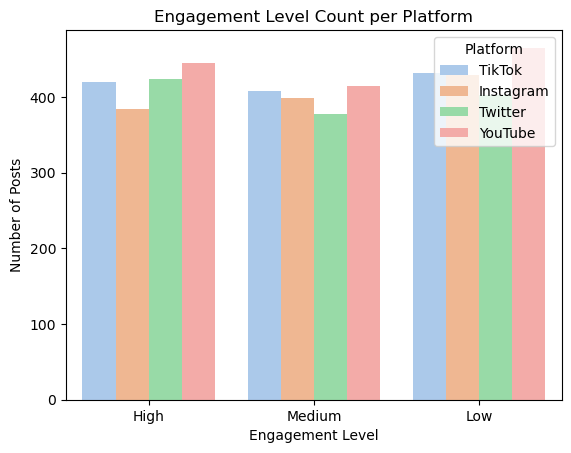

In [ ]:
sns.countplot(data=df, x='Engagement_Level', hue='Platform', palette='pastel')
plt.title('Engagement Level Count per Platform')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Posts')
plt.show()

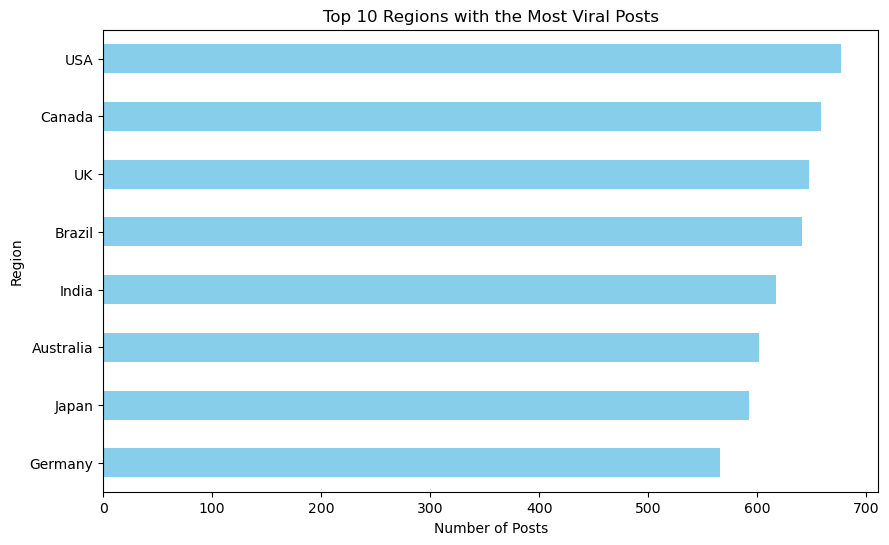

In [ ]:
top_regions = df['Region'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_regions.plot(kind='barh', color='skyblue')
plt.title('Top 10 Regions with the Most Viral Posts')
plt.xlabel('Number of Posts')
plt.gca().invert_yaxis()
plt.show()

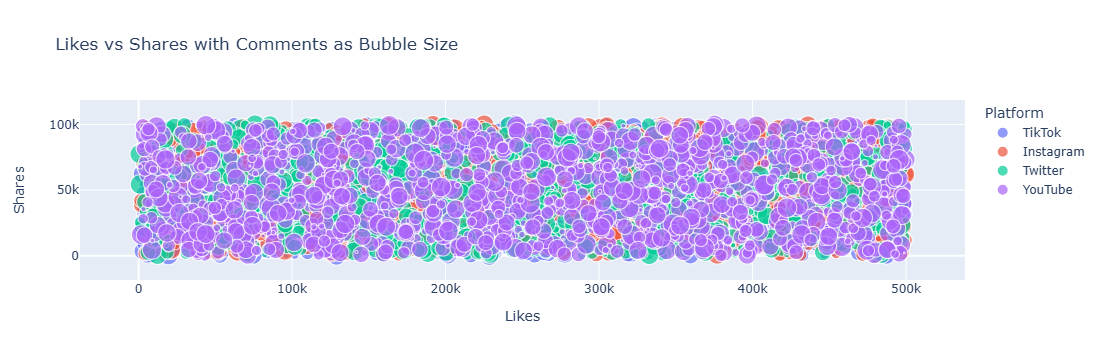

In [ ]:
fig = px.scatter(
    df, x='Likes', y='Shares', color='Platform',
    size='Comments', hover_data=['Hashtag', 'Content_Type'],
    title='Likes vs Shares with Comments as Bubble Size'
)
fig.show()

In [ ]:
chart = alt.Chart(df).mark_bar().encode(
    x=alt.X('count():Q', title='Number of Posts'),
    y=alt.Y('Region:N', sort='-x'),
    color='Engagement_Level:N',
    tooltip=['Region', 'Engagement_Level', 'count()']
).properties(
    title='Engagement Levels by Region',
    width=700,
    height=400
).interactive()

chart

C:\Users\DON PK\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

C:\Users\DON PK\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)